# Microsoft Movie Studio Reccomendations

## Business

Microsoft has expressed interest in entering the film industry by opening a brand new movie studio.  Before opening the studio Microsoft have hired a team of data scientist to reccomend what type of films the studio should create to generate profitability.  This analysis will focus on three questions relating to genres, month to month gross, and current studio gross. 
    
    1. Which movie genres will show the most profitability?
    2. In which months do the consumers go out to buy movie tickets?
    3. What genres of movies do the current studios release to bring them the best profits?

## Data Understanding

Data was taken from three sources IMDB.com, The-Numbers.com, and BoxOfficeMojo.com.  IMDB has a breath of data showing movie titles, release year, run time, and genres.  The Numbers contain information about worldwide gross, production budget, and release date.  BoxOfficeMojo.com has data pertaining to movie studios.  All the data from the three websites were cleaned and merged into a singular dataset to run analysis on and only hold movie data from the year 2010 onwards.

## Starting of Analysis

In [1]:
# Importing packages that are usefull for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import difflib
import sqlite3

In [2]:
# Pulling data from IMDB database into a pandas dataframe

conn = sqlite3.connect("zippedData/im.db")
c = conn.cursor()
c.execute("""
Select *
from movie_basics
""")

df_IMDB = pd.DataFrame(c.fetchall(), columns = ["movie_id", "primary_title", "original_title", "start_year", "runtime_minutues", "genres" ])

### IMDB Information

In [3]:
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movie_id          146144 non-null  object 
 1   primary_title     146144 non-null  object 
 2   original_title    146123 non-null  object 
 3   start_year        146144 non-null  int64  
 4   runtime_minutues  114405 non-null  float64
 5   genres            140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
df_IMDB.describe()

,start_year,runtime_minutues
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [5]:
df_IMDB.head()

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# Importing Box Office Mojo data
df_BOM = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

### Box Office Mojo information

In [7]:
df_BOM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
df_BOM.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [9]:
df_BOM.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
# Importing The Numbers Information
df_Numbers =  pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

### The Numbers Information

In [11]:
df_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
df_Numbers.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [13]:
df_Numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### 1. Merging Data

Creating a common variable for all three data sets to merge on

### 1.1 Finding/Creating merge key

In [16]:
# Using the title and year the movie was released to tie all three databases together
# Doing it first on the IMDB dataframe
df_IMDB["name_year"] = df_IMDB["primary_title"] + " " + df_IMDB["start_year"].astype(str)
df_IMDB

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Kuambil Lagi Hatiku 2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro 2015
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dankyavar Danka 2013
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,6 Gunn 2017


In [18]:
#Name Year on The Numbers
df_Numbers["name_year"] = df_Numbers["movie"] + " " + df_Numbers["release_date"].str.split(" ").str[2]
df_Numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,name_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11 2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Following 1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Return to the Land of Wonders 2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,A Plague So Pleasant 2015


In [20]:
#Name Year on Box Office Mojo
df_BOM["name_year"] = df_BOM["title"] + " " + df_BOM['year'].astype(str)
df_BOM

,title,studio,domestic_gross,foreign_gross,year,name_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Quake 2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,Edward II (2018 re-release) 2018
3384,El Pacto,Sony,2500.0,NaN,2018,El Pacto 2018
3385,The Swan,Synergetic,2400.0,NaN,2018,The Swan 2018


### 1.2 Cleaning Data set to include only movies after 2009

In [24]:
# Making sure that both Box Office Mojo and the Numbers data set only have information for after the year 2009
df_BOM = df_BOM.loc[df_BOM['year'] >= 2010]
df_Numbers = df_Numbers.loc[df_Numbers["release_date"].str.split(" ").str[2].astype(int) >= 2010]

In [25]:
df_Numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,name_year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Star Wars Ep. VII: The Force Awakens 2015
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,Stories of Our Lives 2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,Family Motocross 2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",Newlyweds 2012
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11 2018


### 1.3 Fuzzy/Percentage merge for merge key

In [43]:
# Although the name_year variable are set up to match using 
# get_close_match method to fix the possible changes from different name conventions
# starting with The Numbers dataset

df_Numbers["name_year"] = df_Numbers["name_year"].apply(lambda x : difflib.get_close_matches(x, df_IMDB["name_year"],1, .7))

<ipython-input-43-9a024099a3c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers["name_year"]= df_Numbers["name_year"].apply(lambda x : difflib.get_close_matches(x, df_IMDB["name_year"],1, .7))


In [46]:
# df_Numbers name_year well be reset into a string because running above code  returns it as list
df_Numbers["name_year"] = df_Numbers['name_year'].str[0]

<ipython-input-46-c8002b0c8355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers["name_year"] = df_Numbers['name_year'].str[0]


In [47]:
# This is a proof of concept that it works and the above get_close_matches won't be run on subsequent opening of 
# notebook because it takes too long 
df_Numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,name_year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars: The Last Jedi 2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Star Wars: Episode VII - The Force Awakens 2015
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,Stories of Our Lives 2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,Family Matters 2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",Newlyweds 2011
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11 2019


In [48]:
# Mergeing IMDB with The Numbers
df_merge_IMDB_Numbers = pd.merge(df_IMDB,df_Numbers, how = "outer", on = ["name_year", "name_year"])

In [49]:
 df_merge_IMDB_Numbers

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Sunghursh 2013,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",One Day Before the Rainy Season 2019,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,The Other Side of the Wind 2018,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",Sabse Bada Sukh 2018,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,"Jul 31, 2015",Beyond the Brick: A LEGO Brickumentary,"$1,000,000","$101,531","$101,531"
146222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,"Dec 30, 2011",Jodaeiye Nader az Simin,"$800,000","$7,098,492","$24,426,169"
146223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,"Oct 11, 2013",All the Boys Love Mandy Lane,"$750,000",$0,"$1,960,521"
146224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,"Nov 20, 2015",Siakh lokhamim: ha'slilim ha'gnouzim,"$450,000","$41,260","$42,503"


In [51]:
# cleaning out null values to make merge with Box Office Mojo easier where genres and worldwide gross are not empty
df_merge_IMDB_Numbers = df_merge_IMDB_Numbers.loc[(df_merge_IMDB_Numbers["genres"].notna()) & (df_merge_IMDB_Numbers["worldwide_gross"].notna())]

In [52]:
df_merge_IMDB_Numbers

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",Foodfight! 2012,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
55,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
59,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
61,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
63,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142781,tt9411866,Molly,Molly,2020.0,NaN,Drama,Molly 2020,95.0,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0
143003,tt9447948,317,317,2019.0,NaN,Documentary,317 2019,72.0,"Dec 31, 2019",355,"$75,000,000",$0,$0
143870,tt9589006,The Living Thames,The Living Thames,2018.0,60.0,Documentary,The Living Thames 2018,62.0,"May 14, 2010",The Living Wake,"$500,000","$12,232","$12,232"
144515,tt9671038,Heróis,Heróis,2018.0,70.0,Documentary,Heróis 2018,75.0,"Oct 5, 2018",Hevi reissu,"$3,800,000","$10,153","$10,153"


In [54]:
# Getting Box Office Mojo name year to match with merged name year
df_BOM["name_year"] = df_BOM["name_year"].apply(lambda x : difflib.get_close_matches(x, df_merge_IMDB_Numbers["name_year"],1, .8))

In [55]:
# Same as numbers above chaning df_Bom name year into a non list
df_BOM["name_year"] = df_BOM["name_year"].str[0]

In [56]:
# proof of concept
df_BOM

,title,studio,domestic_gross,foreign_gross,year,name_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows: Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Mule 2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,The Snowman 2017


In [57]:
# merging Box Office Mojo with merged Numbers and IMDB
# doing outer to gather all information to clean afterwords
df_Numbers_IMDB_BOM = pd.merge(df_merge_IMDB_Numbers,df_BOM, how = "outer", on = ["name_year","name_year"])

In [58]:
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",Foodfight! 2012,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",NaN,NaN,NaN,NaN,NaN
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Souvenir,Strand,11400.0,NaN,2018.0
4160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018.0
4161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward II (2018 re-release),FM,4800.0,NaN,2018.0
4162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,El Pacto,Sony,2500.0,NaN,2018.0


## 2. Data Preparation

Preparing the base dataset to analyse.  Saving base dataset for retrieval.  Cleaning out null values in fields that will be analyzed and getting rid of duplicates.  Transforming of certain data into different datatypes for better functionality and analysis.  Will not drop variables/columns for possible future analysis.  Creation of new variables/columns and datasets.

### 2.1 Getting rid of nulls

In [61]:
# Getting rid of nulls in genre, world wide gross, and studio name
df_Numbers_IMDB_BOM = df_Numbers_IMDB_BOM.loc[(df_Numbers_IMDB_BOM["genres"].notna()) & (df_Numbers_IMDB_BOM["worldwide_gross"].notna()) & (df_Numbers_IMDB_BOM["studio"].notna())]

In [62]:
df_Numbers_IMDB_BOM

,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977",Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Quake,Magn.,6200.0,NaN,2018.0
2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",Terkel in Trouble,Indic.,10800.0,NaN,2010.0
2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,"$19,000,000","$31,713,110","$32,589,493",Nobody's Fool,Par.,31700000.0,1800000,2018.0
2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",Red,Sum.,90400000.0,108600000,2010.0


### 2.2 Saving base dataset

In [65]:
#Saving base merged dataset of IMDB,Box Office Mojo, and the Numbers to grab easier for next time
df_Numbers_IMDB_BOM.to_csv("zippedData/IMDB_BOM_Numbers_merged.csv")

In [14]:
# Retrieving data set from folder for subsequent research
df_Numbers_IMDB_BOM= pd.read_csv("zippedData/IMDB_BOM_Numbers_merged.csv")
df_Numbers_IMDB_BOM

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
1,2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
2,3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
3,4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
4,5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977",Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2282,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Quake,Magn.,6200.0,NaN,2018.0
1599,2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",Terkel in Trouble,Indic.,10800.0,NaN,2010.0
1600,2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,"$19,000,000","$31,713,110","$32,589,493",Nobody's Fool,Par.,31700000.0,1800000,2018.0
1601,2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",Red,Sum.,90400000.0,108600000,2010.0


### 2.3 Finding and getting rid of duplicates

In [15]:
# Finding Duplicates
df_Numbers_IMDB_BOM.duplicated().sum()

0

In [16]:
df_Numbers_IMDB_BOM.duplicated("name_year").sum()

177

In [17]:
df_Numbers_IMDB_BOM.loc[df_Numbers_IMDB_BOM.duplicated("name_year")]

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
14,16,tt0435651,The Giver,The Giver,2014.0,97.0,"Drama,Romance,Sci-Fi",The Giver 2014,2.0,"Aug 15, 2014",The Giver,"$25,000,000","$45,090,374","$66,540,205",The Captive,A24,1100000.0,NaN,2014.0
18,21,tt4453750,Before We Go,Before We Go,2014.0,84.0,"Documentary,Drama,News",Before We Go 2014,52.0,"Sep 4, 2015",Before We Go,"$3,000,000","$37,151","$483,938",Before We Go,RTWC,37200.0,NaN,2015.0
28,35,tt0464154,Piranha 3D,Piranha 3D,2010.0,88.0,"Comedy,Horror",Piranha 3D 2010,52.0,"Aug 20, 2010",Piranha 3D,"$24,000,000","$25,003,155","$83,660,160",Piranha 3DD,W/Dim.,377000.0,8100000,2012.0
37,44,tt0477080,Unstoppable,Unstoppable,2010.0,98.0,"Action,Thriller",Unstoppable 2010,19.0,"Nov 12, 2010",Unstoppable,"$95,000,000","$81,562,942","$165,720,921",Unstoppable (2018),WGUSA,101000.0,NaN,2018.0
112,132,tt0947798,Black Swan,Black Swan,2010.0,108.0,"Drama,Thriller",Black Swan 2010,46.0,"Dec 3, 2010",Black Swan,"$13,000,000","$106,954,678","$331,266,710",Black Sea,Focus,1200000.0,NaN,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2136,tt5621080,Blood Ties,Blood Ties,2014.0,NaN,Documentary,Blood Ties 2014,52.0,"Mar 21, 2014",Blood Ties,"$26,000,000","$42,472","$2,923,959",Blood Ties (2014),RAtt.,42500.0,2400000,2014.0
1569,2224,tt6869948,Truth or Dare,Truth or Dare,2018.0,92.0,"Comedy,Drama,Romance",Truth or Dare 2018,91.0,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",Truth or Dare,Uni.,41400000.0,53900000,2018.0
1594,2275,tt7721552,The Crew,The Crew,2018.0,NaN,Documentary,The Crew 2018,42.0,"Dec 31, 2018",The Crow,"$40,000,000",$0,$0,The Charmer,FM,26200.0,NaN,2018.0
1597,2281,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Mule,WB,103800000.0,68700000,2018.0


In [18]:
# Drop duplicated items in name_year column
df_Numbers_IMDB_BOM = df_Numbers_IMDB_BOM.drop_duplicates("name_year")

In [19]:
# Data set with dropped duplicates
df_Numbers_IMDB_BOM

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
1,2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
2,3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
3,4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,FD,13100000.0,10800000,2011.0
4,5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977",Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,2280,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",The Nun,WB (NL),117500000.0,248100000,2018.0
1599,2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",Terkel in Trouble,Indic.,10800.0,NaN,2010.0
1600,2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,"$19,000,000","$31,713,110","$32,589,493",Nobody's Fool,Par.,31700000.0,1800000,2018.0
1601,2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",Red,Sum.,90400000.0,108600000,2010.0


In [20]:
df_Numbers_IMDB_BOM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1602
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1426 non-null   int64  
 1   movie_id           1426 non-null   object 
 2   primary_title      1426 non-null   object 
 3   original_title     1426 non-null   object 
 4   start_year         1426 non-null   float64
 5   runtime_minutues   1414 non-null   float64
 6   genres             1426 non-null   object 
 7   name_year          1426 non-null   object 
 8   id                 1426 non-null   float64
 9   release_date       1426 non-null   object 
 10  movie              1426 non-null   object 
 11  production_budget  1426 non-null   object 
 12  domestic_gross_x   1426 non-null   object 
 13  worldwide_gross    1426 non-null   object 
 14  title              1426 non-null   object 
 15  studio             1426 non-null   object 
 16  domestic_gross_y   1425 

In [245]:
df_Numbers_IMDB_BOM.describe()

,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
count,1426.000000,1426.000000,1414.000000,1426.000000,1.426000e+03,1.426000e+03,1.425000e+03,1426.000000,1426.000000,1.426000e+03
mean,1044.657083,2013.687938,108.300566,50.900421,4.803662e+07,1.566103e+08,6.149902e+07,2013.648668,6.899018,1.085736e+08
std,663.732643,2.540912,18.696921,28.236046,5.643353e+07,2.435868e+08,8.868349e+07,2.523571,3.428412,2.023182e+08
min,1.000000,2010.000000,22.000000,1.000000,1.730000e+04,0.000000e+00,1.000000e+03,2010.000000,1.000000,-1.104502e+08
25%,464.250000,2011.000000,96.000000,27.000000,1.000000e+07,1.831610e+07,6.900000e+06,2011.000000,4.000000,1.768676e+06
50%,976.000000,2014.000000,106.000000,51.000000,2.725000e+07,6.531321e+07,3.240000e+07,2014.000000,7.000000,3.379168e+07
75%,1611.750000,2016.000000,118.000000,75.000000,6.000000e+07,1.754712e+08,7.560000e+07,2016.000000,10.000000,1.208395e+08
max,2302.000000,2019.000000,181.000000,100.000000,4.106000e+08,2.053311e+09,9.367000e+08,2018.000000,12.000000,1.748134e+09


### 2.4 Tranforming Data

In [21]:
# Transforming production budget into an integer
df_Numbers_IMDB_BOM["production_budget"] = df_Numbers_IMDB_BOM["production_budget"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)

<ipython-input-21-5423a146f176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["production_budget"] = df_Numbers_IMDB_BOM["production_budget"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)


In [22]:
# Transforming world wide gross into integer
df_Numbers_IMDB_BOM["worldwide_gross"] = df_Numbers_IMDB_BOM["worldwide_gross"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)

<ipython-input-22-e663c51959d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["worldwide_gross"] = df_Numbers_IMDB_BOM["worldwide_gross"].str.split("$").str[1].apply(lambda x : x.replace(",","")).astype(int)


In [23]:
#check changes
df_Numbers_IMDB_BOM

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,"$58,236,838",187861183,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
1,2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,28000000,"$26,017,685",62108587,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
2,3,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
3,4,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,45000000,"$13,109,815",21544732,The Rum Diary,FD,13100000.0,10800000,2011.0
4,5,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,36000000,"$99,967,670",193737977,Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,2280,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,50000000,"$103,804,407",170857676,The Nun,WB (NL),117500000.0,248100000,2018.0
1599,2284,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,1500000,$0,98806,Terkel in Trouble,Indic.,10800.0,NaN,2010.0
1600,2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,19000000,"$31,713,110",32589493,Nobody's Fool,Par.,31700000.0,1800000,2018.0
1601,2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,60000000,"$90,380,162",196439693,Red,Sum.,90400000.0,108600000,2010.0


In [24]:
# Changing release date to a datetime datatype for ease of use
df_Numbers_IMDB_BOM["release_date"] = pd.to_datetime(df_Numbers_IMDB_BOM["release_date"])

# Creating Month Column
df_Numbers_IMDB_BOM["month"] = df_Numbers_IMDB_BOM['release_date'].dt.month

# Changing month name to string name ex.(1 = January)
df_Numbers_IMDB_BOM['month_name'] = df_Numbers_IMDB_BOM['month'].apply(lambda x : calendar.month_name[x])

# Profits Column where world wide gross subtracted from production budget
df_Numbers_IMDB_BOM["profit"] = df_Numbers_IMDB_BOM["worldwide_gross"] - df_Numbers_IMDB_BOM["production_budget"]

# Making a copy of the original set to explode
# This explode idea came from a line of code from the previous cohort
# Greg Burges, Nimeshi Fernando, and Tyler Wood
df_Numbers_IMDB_BOM_Explode = df_Numbers_IMDB_BOM.copy()

# Making genres into a list to explode 
df_Numbers_IMDB_BOM_Explode["genres"] = df_Numbers_IMDB_BOM_Explode["genres"].str.split(',')

# Exploded copy of Genres
df_genres = df_Numbers_IMDB_BOM_Explode.explode("genres")

<ipython-input-24-a2aec6cb693d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["release_date"] = pd.to_datetime(df_Numbers_IMDB_BOM["release_date"])
<ipython-input-24-a2aec6cb693d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Numbers_IMDB_BOM["month"] = df_Numbers_IMDB_BOM['release_date'].dt.month
<ipython-input-24-a2aec6cb693d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [25]:
df_genres

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutues,genres,name_year,id,release_date,...,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year,month,month_name,profit
0,1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,Adventure,The Secret Life of Walter Mitty 2013,37.0,2013-12-25,...,"$58,236,838",187861183,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0,12,December,96861183
0,1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,Comedy,The Secret Life of Walter Mitty 2013,37.0,2013-12-25,...,"$58,236,838",187861183,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0,12,December,96861183
0,1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,Drama,The Secret Life of Walter Mitty 2013,37.0,2013-12-25,...,"$58,236,838",187861183,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0,12,December,96861183
1,2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,Action,A Walk Among the Tombstones 2014,67.0,2014-09-19,...,"$26,017,685",62108587,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0,9,September,34108587
1,2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,Crime,A Walk Among the Tombstones 2014,67.0,2014-09-19,...,"$26,017,685",62108587,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0,9,September,34108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,Comedy,Nobody's Fool 2018,38.0,2018-11-02,...,"$31,713,110",32589493,Nobody's Fool,Par.,31700000.0,1800000,2018.0,11,November,13589493
1600,2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,Drama,Nobody's Fool 2018,38.0,2018-11-02,...,"$31,713,110",32589493,Nobody's Fool,Par.,31700000.0,1800000,2018.0,11,November,13589493
1600,2285,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,Romance,Nobody's Fool 2018,38.0,2018-11-02,...,"$31,713,110",32589493,Nobody's Fool,Par.,31700000.0,1800000,2018.0,11,November,13589493
1601,2297,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,2010-10-15,...,"$90,380,162",196439693,Red,Sum.,90400000.0,108600000,2010.0,10,October,136439693


In [26]:
# Getting the value counts of genres
df_genres["genres"].value_counts()

# Getting rid of Genres that don't have more than 10 movies would skew data
df_genres = df_genres.loc[(df_genres["genres"] != "News") & (df_genres["genres"] != "Musical")] 

## 3. Data Manipulation

In [27]:
# Checking for pearson correlation with columns with integers of original non clean data set
df_Numbers_IMDB_BOM.corr(method = "pearson")

,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
Unnamed: 0,1.000000,0.706492,-0.020928,0.017008,-0.142696,-0.039759,-0.048568,0.655384,0.036129,-0.008066
start_year,0.706492,1.000000,0.107653,0.023785,0.063549,0.099016,0.088168,0.928679,0.002905,0.101487
runtime_minutues,-0.020928,0.107653,1.000000,-0.017419,0.354792,0.312103,0.287782,0.104198,0.167947,0.276827
id,0.017008,0.023785,-0.017419,1.000000,-0.078736,-0.052188,-0.043823,0.027705,-0.014414,-0.040871
production_budget,-0.142696,0.063549,0.354792,-0.078736,1.000000,0.785169,0.708055,0.061108,0.019255,0.666392
worldwide_gross,-0.039759,0.099016,0.312103,-0.052188,0.785169,1.000000,0.933249,0.102207,0.038116,0.984968
domestic_gross_y,-0.048568,0.088168,0.287782,-0.043823,0.708055,0.933249,1.000000,0.103538,0.044098,0.926091
year,0.655384,0.928679,0.104198,0.027705,0.061108,0.102207,0.103538,1.000000,-0.007186,0.106010
month,0.036129,0.002905,0.167947,-0.014414,0.019255,0.038116,0.044098,-0.007186,1.000000,0.040520
profit,-0.008066,0.101487,0.276827,-0.040871,0.666392,0.984968,0.926091,0.106010,0.040520,1.000000


In [28]:
# Correlation of data that was cleaned, exploded and removed outliers
df_genres.corr(method = "pearson")

,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
Unnamed: 0,1.000000,0.712474,-0.007507,0.023407,-0.139699,-0.030974,-0.038981,0.673564,0.049784,0.001340
start_year,0.712474,1.000000,0.118114,0.025152,0.059879,0.099262,0.088663,0.944037,0.005330,0.102701
runtime_minutues,-0.007507,0.118114,1.000000,-0.025778,0.370135,0.323128,0.296601,0.114848,0.163838,0.285986
id,0.023407,0.025152,-0.025778,1.000000,-0.085256,-0.058934,-0.053398,0.024952,-0.019257,-0.047263
production_budget,-0.139699,0.059879,0.370135,-0.085256,1.000000,0.782657,0.707334,0.059336,0.013788,0.664137
worldwide_gross,-0.030974,0.099262,0.323128,-0.058934,0.782657,1.000000,0.936102,0.101416,0.035135,0.985144
domestic_gross_y,-0.038981,0.088663,0.296601,-0.053398,0.707334,0.936102,1.000000,0.100138,0.036591,0.929154
year,0.673564,0.944037,0.114848,0.024952,0.059336,0.101416,0.100138,1.000000,-0.010454,0.105438
month,0.049784,0.005330,0.163838,-0.019257,0.013788,0.035135,0.036591,-0.010454,1.000000,0.038395
profit,0.001340,0.102701,0.285986,-0.047263,0.664137,0.985144,0.929154,0.105438,0.038395,1.000000


### 3.1 Production Budget vs Profit

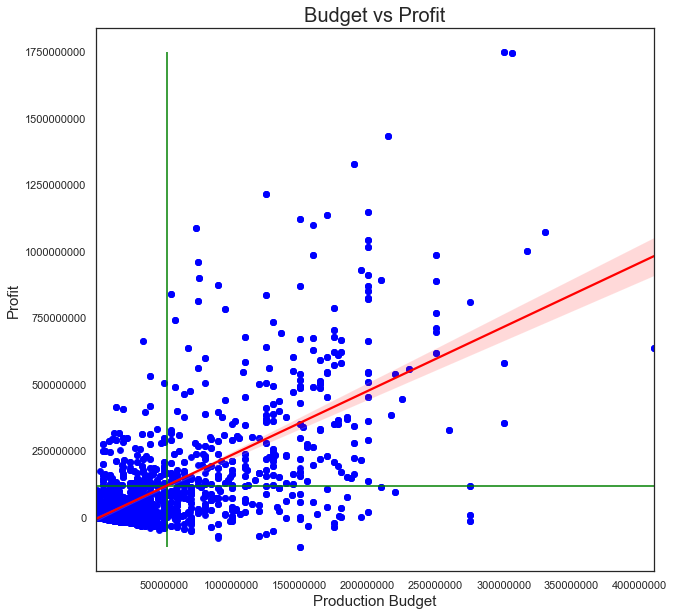

In [193]:
#Scatter Plot of production budget vs worldwide gross 
sns.set_style("white")
fig, ax = plt.subplots(figsize = (10,10))

sns.scatterplot( x = "production_budget", y = "profit", 
                data = df_genres, color = "blue")
sns.regplot(x = "production_budget", y ='profit', data =df_genres, 
           scatter_kws = {"color" : "blue"}, line_kws = {"color": "red"})
ax.vlines(df_genres["production_budget"].mean(),ymin = df_genres["profit"].min(),
         ymax = df_genres['profit'].max(),color = "green")
ax.hlines(df_genres["profit"].mean(), xmin = df_genres["production_budget"].min(),
         xmax = df_genres["production_budget"].max(), color = "green")
ax.set_xlabel("Production Budget", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)
ax.set_title("Budget vs Profit", fontsize = 20)
ax.ticklabel_format(useOffset = False, style = "plain")
plt.savefig("Images/BudgetvsProfitScatter.png")
plt.show()

#### Insight
    The scatter plot of Production Budget vs Profit shows a slight/weak positive correlation where most of the points fall  in and around where the average production budget meets the average profit section

In [30]:
# Further breakdown of Budget vs Profit averages but based on genres
df_genres_group = df_genres.groupby(by = "genres").mean().reset_index()

df_genres_group

,genres,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
0,Action,956.421176,2013.967059,113.371765,52.277647,8.403176e+07,2.600514e+08,9.471611e+07,2013.948235,6.376471,1.760196e+08
1,Adventure,969.476190,2014.030812,110.946779,49.226891,1.070762e+08,3.649146e+08,1.290736e+08,2014.070028,6.924370,2.578384e+08
2,Animation,1040.844037,2013.990826,94.568807,45.944954,9.417431e+07,3.613171e+08,1.301712e+08,2014.064220,7.064220,2.671428e+08
3,Biography,1179.714286,2014.669173,117.112782,54.248120,2.563737e+07,8.461003e+07,3.952632e+07,2014.563910,8.278195,5.897266e+07
4,Comedy,1030.399225,2013.521318,103.033010,48.711240,4.197995e+07,1.418184e+08,6.181536e+07,2013.490310,6.835271,9.983843e+07
5,Crime,1078.583333,2013.814815,110.699074,49.689815,3.365405e+07,9.134228e+07,3.992756e+07,2013.722222,6.925926,5.768823e+07
6,Documentary,1502.911765,2013.058824,76.366667,53.323529,1.713088e+07,5.051083e+07,2.410359e+07,2012.676471,5.411765,3.337994e+07
7,Drama,1084.843750,2013.666193,112.135714,50.867898,2.838468e+07,8.182992e+07,3.557123e+07,2013.634943,7.312500,5.344523e+07
8,Family,856.097561,2013.000000,104.792683,54.134146,7.262378e+07,2.153231e+08,8.055800e+07,2012.902439,7.317073,1.426993e+08
9,Fantasy,782.322835,2013.590551,111.685039,48.818898,9.209449e+07,2.881408e+08,9.875050e+07,2013.535433,6.653543,1.960463e+08


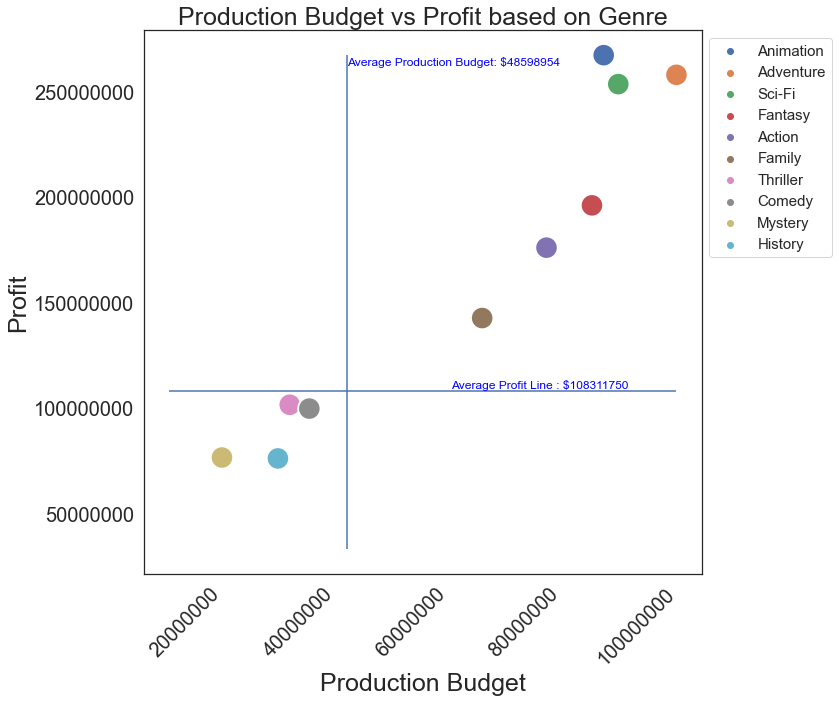

In [194]:
#Scatter Plot of production budge vs worldwide gross with genre as legend, come back to fix, top 10 genres
fig, ax = plt.subplots(figsize = (10,10))

sns.set_style("white")
sns.scatterplot( x = "production_budget", y = "profit", s = 500, hue = "genres",
                data = df_genres_group.sort_values("profit", ascending = False).head(10))
ax.vlines(df_genres_group["production_budget"].mean(),ymin = df_genres_group["profit"].min(),
         ymax = df_genres_group['profit'].max())
plt.text(x = df_genres_group["production_budget"].mean() + 3, 
        y = df_genres_group["profit"].max() - 5000000, 
        s = "Average Production Budget: ${:.0f}".format(df_genres_group["production_budget"].mean()), 
         color = "blue")
plt.text(x = df_genres_group["production_budget"].max() - 40000000, 
        y = df_genres_group["profit"].mean() + 1000000, 
        s = "Average Profit Line : ${:.0f}".format(df_genres_group["profit"].mean()), 
         color = "blue")
ax.hlines(df_genres_group["profit"].mean(), xmin = df_genres_group["production_budget"].min(),
         xmax = df_genres_group["production_budget"].max())
ax.set_xlabel("Production Budget", fontsize = 25)
ax.set_ylabel("Profit", fontsize = 25)
ax.set_title("Production Budget vs Profit based on Genre", fontsize = 25)
ax.legend(bbox_to_anchor = (1,1), loc = "upper left", borderaxespad=.5, fontsize = 15)
plt.ticklabel_format(style = "plain", axis = "both")
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig("Images/GenreScatter.png", bbox_inches = "tight")
plt.show()

#### Insight
    Graph shows the top performing genres based on average profit with six genres Animation, Adventure, Sci-Fi, Fantasy,
    Action, and Family all in the top right quandrant signaling they are above the average production budget and average 
    profit lines.

### 3.2 Average Month to Month Profit

In [35]:
# Break down of average profit per month
df_month = df_genres.groupby(["month_name"]).mean().reset_index()
df_month.sort_values("month", inplace = True)
df_month.head()

,month_name,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
4,January,978.305936,2013.922374,103.379630,52.534247,3.611826e+07,9.532495e+07,3.662335e+07,2013.922374,1.0,5.920668e+07
3,February,950.868217,2013.782946,105.887160,55.961240,4.409457e+07,1.412586e+08,6.487059e+07,2013.875969,2.0,9.716406e+07
7,March,948.523810,2013.784127,105.884615,47.717460,5.683159e+07,1.565117e+08,5.909026e+07,2013.857143,3.0,9.968013e+07
0,April,1074.227586,2013.420690,106.326389,50.500000,3.692726e+07,1.386575e+08,5.024083e+07,2013.475862,4.0,1.017303e+08
8,May,924.883817,2013.485477,111.975104,48.564315,8.787635e+07,2.705548e+08,9.753457e+07,2013.489627,5.0,1.826784e+08


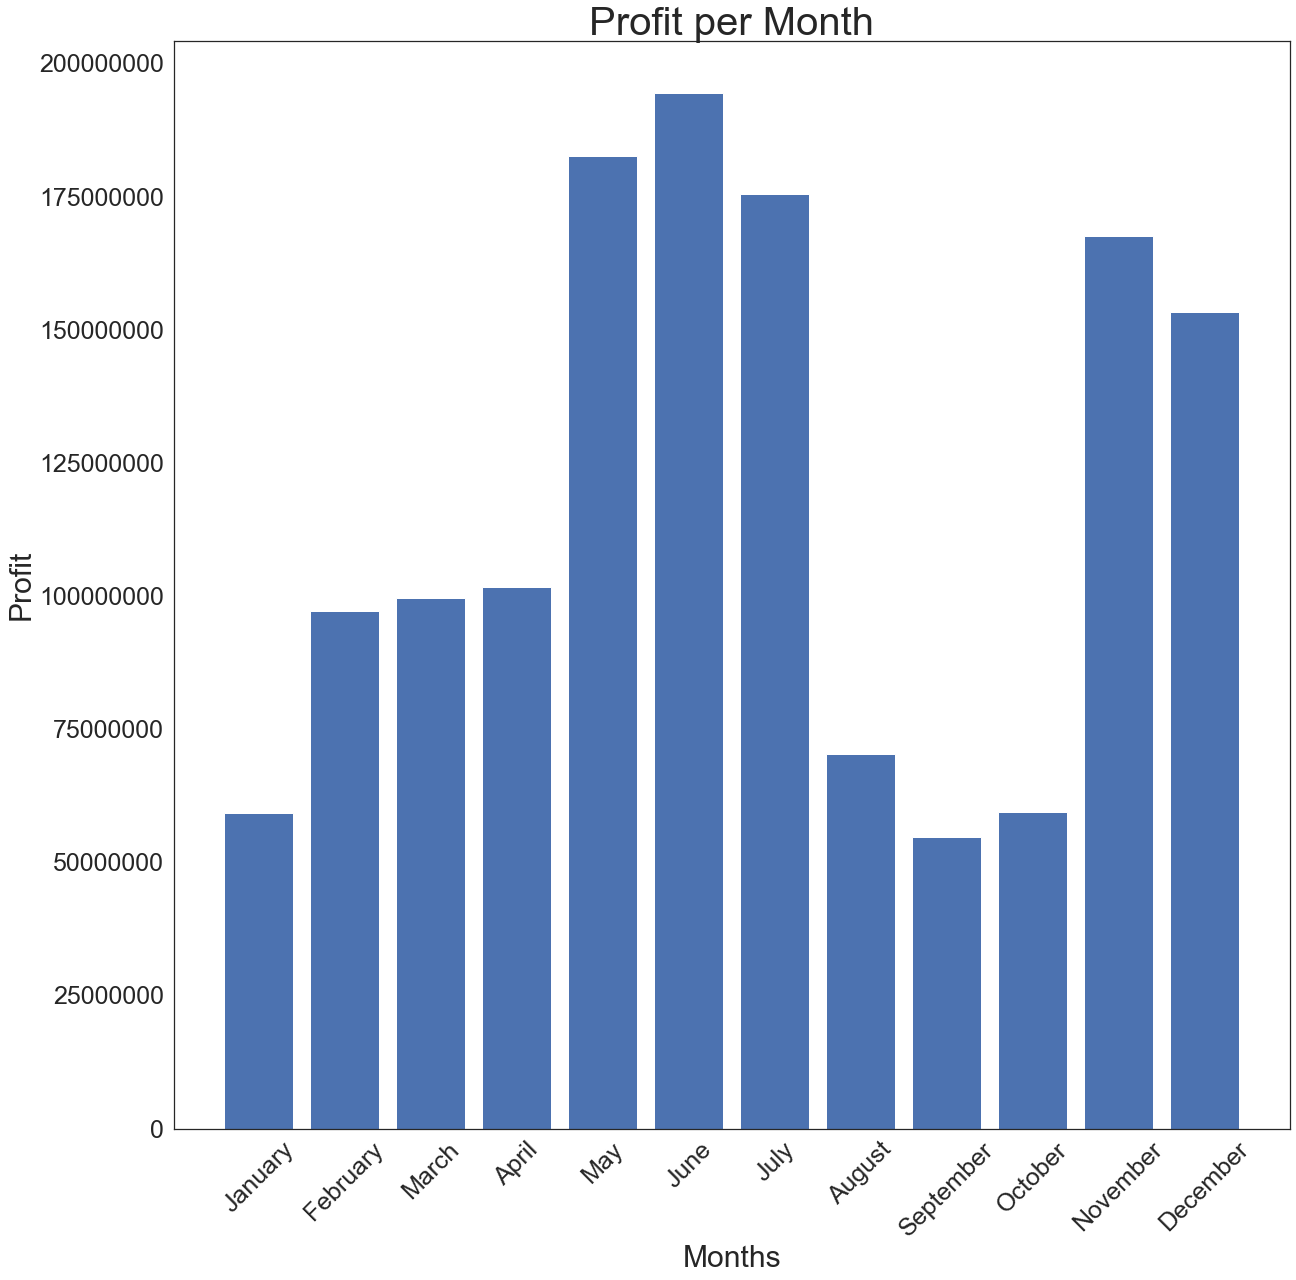

In [246]:
# graph of world wide gross by month
fig, ax = plt.subplots(figsize = (20,20))

x = df_month['month_name']
y = df_month["profit"]

ax.bar(x, y)
ax.set_xlabel("Months", fontsize = 30)
ax.set_ylabel("Profit", fontsize = 30)
ax.set_title("Profit per Month", fontsize = 40)
plt.ticklabel_format(style = "plain", axis = "y")
plt.xticks(rotation = 45, fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig("Images/ProfitPerMonth.png", bbox_inches= "tight")
plt.show()

#### Insight
    Graph shows the average profit on a month to month basis and has the months of May, June, July, November, and December
    performing very well

In [37]:
# Further breaks down average month to month profit over genres
df_month_genres = df_genres.groupby(["month_name","genres"]).mean().reset_index()
df_month_genres.sort_values("month", inplace = True)
df_month_genres.head()

,month_name,genres,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
83,January,Crime,815.133333,2013.533333,109.400000,42.000000,4.710000e+07,7.934189e+07,4.490667e+07,2013.533333,1.0,3.224189e+07
78,January,Action,877.552632,2014.052632,106.578947,52.289474,5.096053e+07,1.155263e+08,4.064237e+07,2014.184211,1.0,6.456580e+07
79,January,Adventure,756.200000,2014.133333,102.333333,56.933333,5.773333e+07,1.481609e+08,4.775141e+07,2014.333333,1.0,9.042761e+07
80,January,Animation,1200.500000,2015.500000,94.500000,33.250000,5.775000e+07,1.792698e+08,5.715000e+07,2015.500000,1.0,1.215198e+08
81,January,Biography,1541.600000,2014.400000,91.800000,54.400000,1.820000e+07,8.127867e+07,1.897468e+07,2014.200000,1.0,6.307867e+07


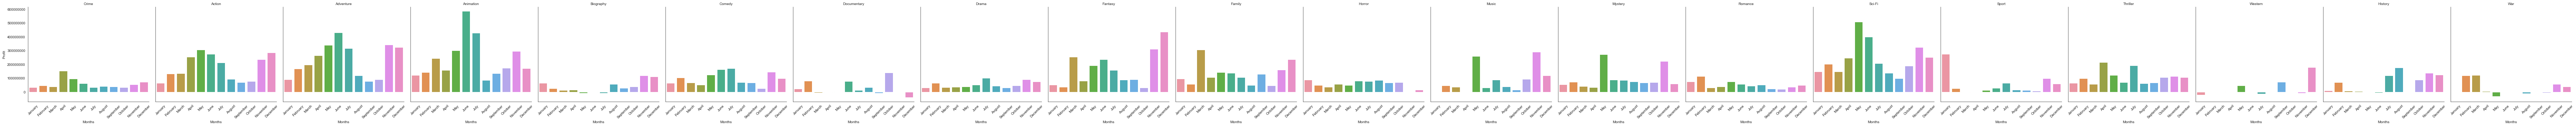

In [91]:
# Making a bar graph of Month to Month Profit based on genre
g = sns.catplot(x = "month_name", y = "profit", col = "genres", kind = "bar",data = df_month_genres, height = 5, aspect =1)
g.set_axis_labels("Months", "Profit")
g.set_titles(col_template = "{col_name}")
g.set_xticklabels(rotation = 45)
plt.ticklabel_format(style = "plain", axis = "y")
g.tight_layout()

#### Insight
        Break down of genres on a per month basis with the aformentioned months having a lot of genres the garnered good
        profit, but especially the genres of Action, Animation, Adventure, and Sci-fi performing well in profits

In [41]:
# Making a data set only on the most profitable months of May, June, July, Nov, December
df_month_genres_profitable_summer = df_month_genres.loc[(df_month_genres["month"].between(5,7))]
df_month_genres_profitable_winter = df_month_genres.loc[(df_month_genres["month"].between(11,12))]
df_month_genres_profitable_summer
df_month_genres_profitable_winter

# Making a data set for only profits exceeding 200000000
df_month_genres_profitable_high_summer = df_month_genres_profitable_summer.loc[df_month_genres_profitable_summer["profit"]>200000000]
df_month_genres_profitable_high_winter = df_month_genres_profitable_winter.loc[df_month_genres_profitable_winter["profit"]>200000000]

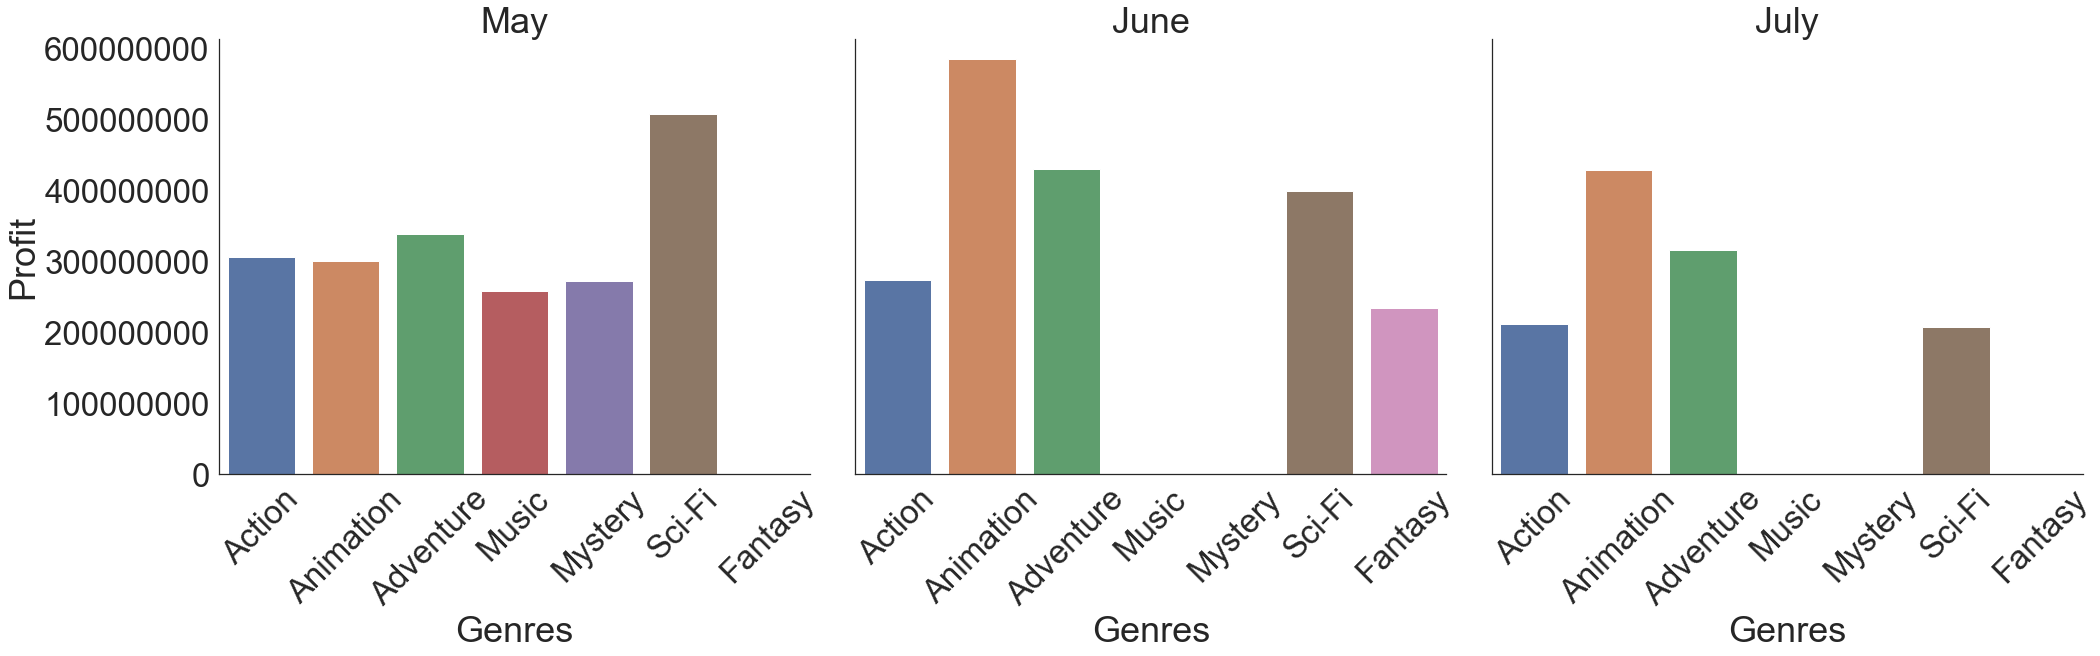

In [244]:
# Bar Graph of genres that made over 200,000,000 in the most profitable months for Summer
with sns.plotting_context("notebook", font_scale = 3):
    g = sns.catplot(x = "genres", y = "profit", col = "month_name", kind = "bar",
                    data = df_month_genres_profitable_high_summer, height = 10, aspect =1)
    g.set_axis_labels("Genres", "Profit")
    g.set_titles(col_template = "{col_name}")
    g.set_xticklabels(rotation = 45)
    plt.ticklabel_format(style = "plain", axis = "y")
    g.tight_layout()
    plt.savefig("Images/GenresProfitperMonthSummer.png")

#### Insights
    Break down of genres that exceed 200,000,000 in profit for the Summer months of May, June, and July
    Genres such as Action, Animation, Adventure, and Sci-Fi perform particularly well

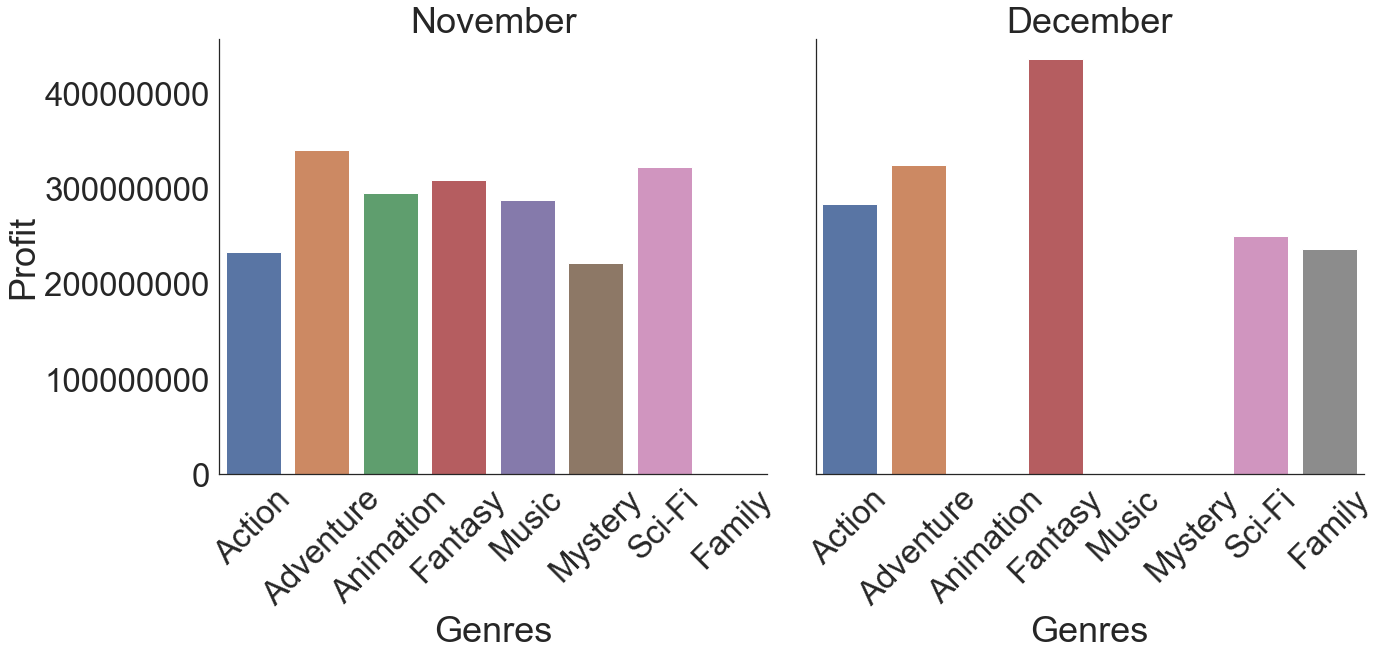

In [243]:
# Bar Graph of genres that made over 200,000,000 in the most profitable months for Winter
with sns.plotting_context("notebook", font_scale = 3):
    g = sns.catplot(x = "genres", y = "profit", col = "month_name", kind = "bar",
                    data = df_month_genres_profitable_high_winter, height = 10, aspect =1)
    g.set_axis_labels("Genres", "Profit")
    g.set_titles(col_template = "{col_name}")
    g.set_xticklabels(rotation = 45)
    plt.ticklabel_format(style = "plain", axis = "y")
    g.tight_layout()
    plt.savefig("Images/GenresProfitperMonthWinter.png")

#### Insights
    Break down of genres that exceed 200,000,000 in profit for the winter months of November and December
    Genres such as Action, Animation, Adventure, and Sci-Fi perform particularly well

### 3.3 Studio Profits

In [56]:
# Studio profit averages that are over 100,000,000
df_studio = df_Numbers_IMDB_BOM.groupby(by = "studio").mean().reset_index()
df_studio
df_studio = df_studio.loc[df_studio['profit'] > 100000000]
df_studio

# Rename Studio so it looks better
df_studio["studio"] = df_studio["studio"].replace(["BV", "GrtIndia", "P/DW", "Par.", "Sum.", "Uni.", "WB (NL)"], 
                                        ["Buena Vista", "Great India Films", "Paramount/DreamWorks", "Paramount", 
                                         "Summit", "Universal", "WB (New Line)"])
df_studio

,studio,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
17,Buena Vista,1046.168539,2014.033708,115.561798,39.573034,1.329079e+08,4.913911e+08,1.886303e+08,2013.898876,7.112360,3.584832e+08
38,Fox,991.224000,2013.688000,109.568000,45.864000,6.864560e+07,2.327364e+08,8.230000e+07,2013.712000,7.320000,1.640908e+08
44,Great India Films,2064.000000,2017.000000,167.000000,55.000000,3.000000e+07,2.635029e+08,2.020000e+07,2017.000000,4.000000,2.335029e+08
71,Paramount/DreamWorks,229.000000,2010.900000,101.500000,43.900000,1.334000e+08,5.078028e+08,1.682900e+08,2010.900000,6.700000,3.744028e+08
77,Paramount,972.160920,2013.885057,111.091954,53.885057,6.672414e+07,2.114248e+08,8.424260e+07,2013.896552,7.229885,1.447007e+08
91,Sony,958.674699,2013.795181,110.542169,51.493976,7.084940e+07,2.283523e+08,9.200000e+07,2013.807229,7.337349,1.575029e+08
94,Summit,505.428571,2011.142857,103.857143,64.214286,4.480714e+07,1.619954e+08,6.588364e+07,2010.571429,6.357143,1.171883e+08
100,Universal,1066.165414,2014.022556,109.699248,52.225564,5.738120e+07,2.299408e+08,8.971457e+07,2014.045113,6.488722,1.725596e+08
104,WB,870.290598,2013.760684,114.341880,54.025641,8.223077e+07,2.407148e+08,9.682051e+07,2013.786325,6.923077,1.584840e+08
105,WB (New Line),1026.333333,2014.119048,109.214286,49.214286,5.549048e+07,2.208146e+08,8.968095e+07,2014.119048,6.476190,1.653242e+08


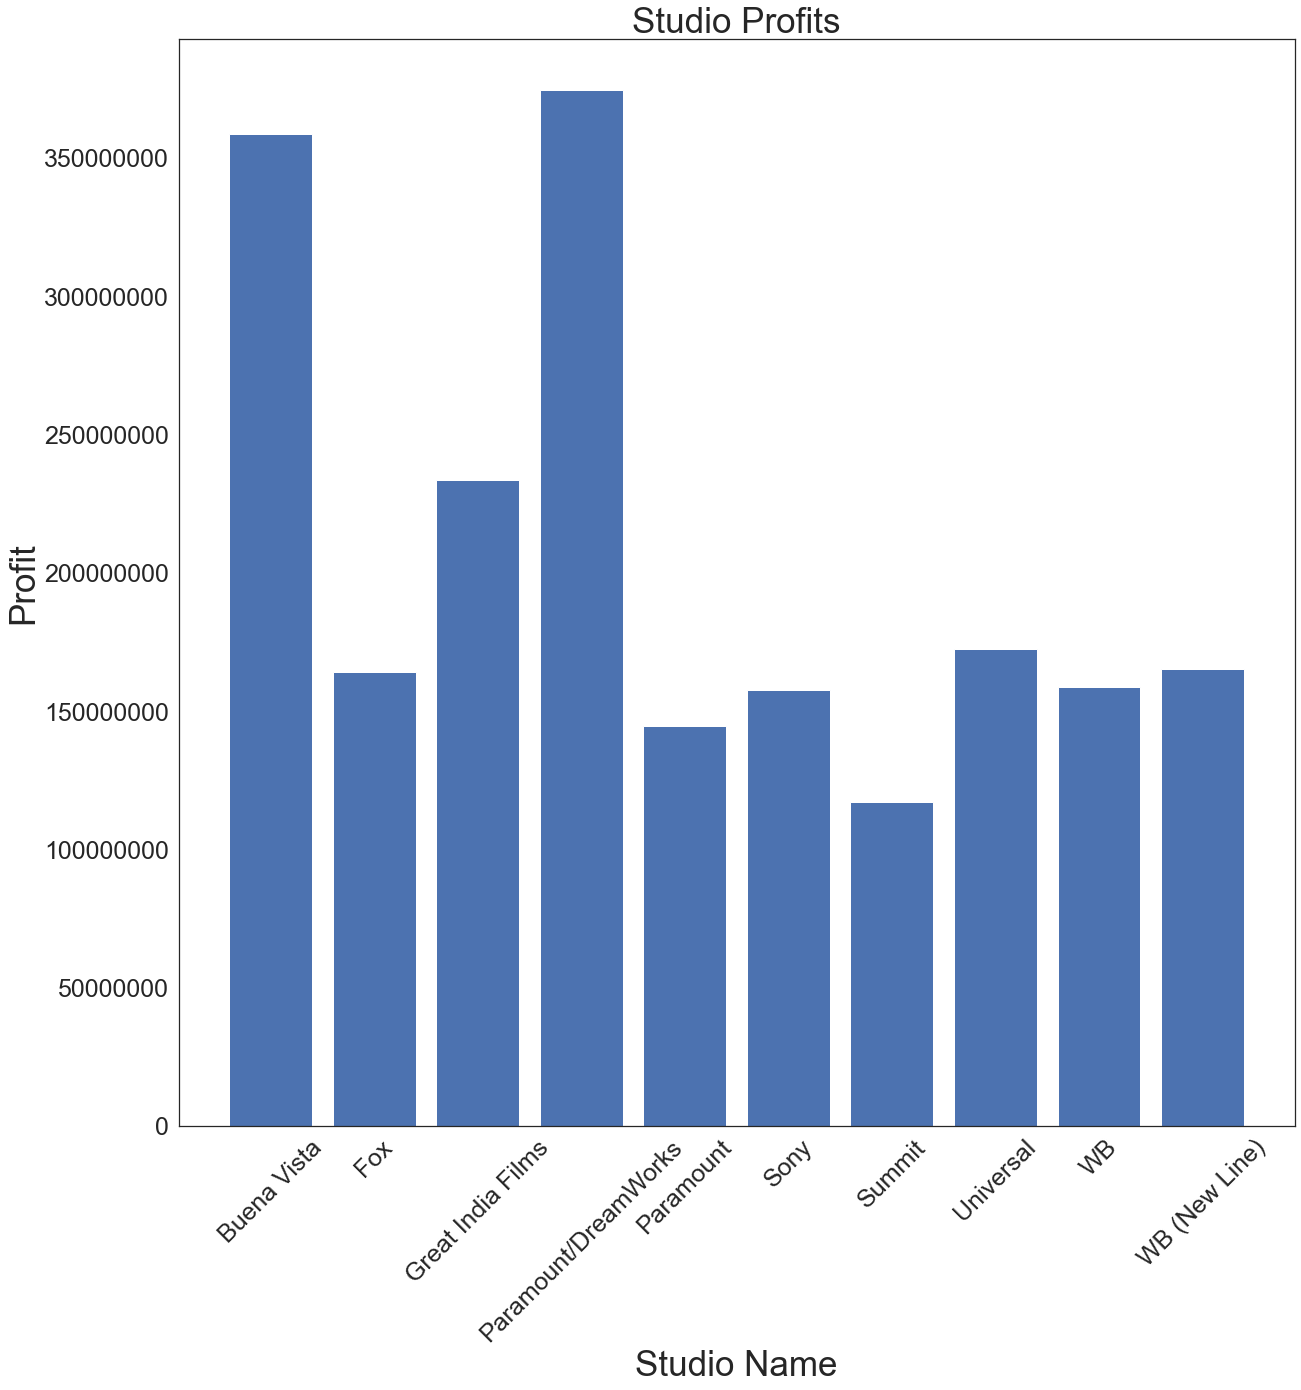

In [247]:
fig, ax = plt.subplots(figsize = (20,20))
x = df_studio['studio']
y = df_studio['profit'] 

ax.bar(x,y)
ax.set_ylabel("Profit", fontsize = 35)
ax.set_xlabel("Studio Name", fontsize = 35)
ax.set_title("Studio Profits", fontsize = 35)
plt.xticks(rotation = 45, fontsize = 25)
plt.yticks(fontsize = 25)
plt.ticklabel_format(style = "plain", axis = "y")
plt.savefig("Images/StudioProfits.png", bbox_inches = "tight")
plt.show()

#### Insight
        Breakdown of the top performing studios on average, Studios include, Buena Vista, Fox, Great India
        Films,Paramount/Dreamwork, Paramount, Sony, Summit, Universal, WB, and WB(New Line). BV and P/DW are leading the 
        pack in terms of profit

In [86]:
# Break down of Studio profits by genres
df_studio_genres = df_genres.groupby(["studio","genres"]).mean().reset_index()
df_studio_genres = df_studio_genres.loc[df_studio_genres['profit'] > 10000000]

#Renaming top 10 studios for Graph
df_studio_genres["studio"] = df_studio_genres["studio"].replace(["BV", "GrtIndia", "P/DW", "Par.", "Sum.", "Uni.", 
                                                                 "WB (NL)"], ["Buena Vista", "Great India Films", 
                                                                              "Paramount/DreamWorks", "Paramount", 
                                                                              "Summit", "Universal", "WB (New Line)"])
df_studio_genres

,studio,genres,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
0,3D,Documentary,629.000000,2010.000000,41.000000,31.000000,5.000000e+06,1.651520e+07,6.100000e+06,2010.000000,5.000000,1.151520e+07
3,A24,Biography,1984.500000,2016.500000,63.000000,97.000000,6.750000e+06,3.458609e+07,2.310000e+07,2016.500000,7.000000,2.783609e+07
4,A24,Comedy,1566.444444,2014.777778,95.333333,42.777778,6.055556e+06,1.974899e+07,1.217778e+07,2015.111111,6.888889,1.369344e+07
6,A24,Documentary,2170.000000,2016.000000,22.000000,94.000000,3.500000e+06,4.045452e+07,2.510000e+07,2016.000000,2.000000,3.695452e+07
7,A24,Drama,1627.368421,2015.263158,103.842105,47.526316,6.968421e+06,2.419005e+07,1.382437e+07,2015.526316,7.157895,1.722163e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
718,Yash,Drama,1662.000000,2014.000000,173.000000,82.000000,1.010000e+07,3.939822e+07,4.600000e+06,2014.000000,9.000000,2.929822e+07
720,Yash,Sport,2060.000000,2016.000000,170.000000,100.000000,1.100000e+07,7.298978e+07,6.200000e+06,2016.000000,7.000000,6.198978e+07
723,Zeit.,Action,725.000000,2011.000000,117.000000,95.000000,2.500000e+07,8.124918e+07,7.120000e+04,2011.000000,1.000000,5.624918e+07
724,Zeit.,Adventure,725.000000,2011.000000,117.000000,95.000000,2.500000e+07,8.124918e+07,7.120000e+04,2011.000000,1.000000,5.624918e+07


In [87]:
# Counting Genres
df_studio_genres["genres"].value_counts()

Drama          36
Comedy         35
Action         31
Mystery        28
Adventure      27
Horror         26
Thriller       25
Crime          24
Romance        23
Sci-Fi         20
Fantasy        20
Biography      17
Animation      14
Family         13
Sport          12
Music          11
History        10
Documentary     7
War             5
Western         4
Name: genres, dtype: int64

In [79]:
#Removing Movie genres with less than 10 movies
df_studio_genres_clean = df_studio_genres.loc[(df_studio_genres["genres"] != "Western") & 
                                            (df_studio_genres["genres"] != "Documentary") & 
                                            (df_studio_genres["genres"] != "War")]
df_studio_genres_clean

,studio,genres,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
3,A24,Biography,1984.500000,2016.500000,63.000000,97.000000,6.750000e+06,3.458609e+07,2.310000e+07,2016.500000,7.000000,2.783609e+07
4,A24,Comedy,1566.444444,2014.777778,95.333333,42.777778,6.055556e+06,1.974899e+07,1.217778e+07,2015.111111,6.888889,1.369344e+07
7,A24,Drama,1627.368421,2015.263158,103.842105,47.526316,6.968421e+06,2.419005e+07,1.382437e+07,2015.526316,7.157895,1.722163e+07
9,A24,Horror,1690.600000,2015.400000,104.600000,35.200000,7.260000e+06,2.055582e+07,1.314000e+07,2015.800000,5.800000,1.329582e+07
11,A24,Mystery,1330.750000,2015.750000,105.750000,44.250000,9.500000e+06,3.642908e+07,2.277500e+07,2016.250000,4.750000,2.692908e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
718,Yash,Drama,1662.000000,2014.000000,173.000000,82.000000,1.010000e+07,3.939822e+07,4.600000e+06,2014.000000,9.000000,2.929822e+07
720,Yash,Sport,2060.000000,2016.000000,170.000000,100.000000,1.100000e+07,7.298978e+07,6.200000e+06,2016.000000,7.000000,6.198978e+07
723,Zeit.,Action,725.000000,2011.000000,117.000000,95.000000,2.500000e+07,8.124918e+07,7.120000e+04,2011.000000,1.000000,5.624918e+07
724,Zeit.,Adventure,725.000000,2011.000000,117.000000,95.000000,2.500000e+07,8.124918e+07,7.120000e+04,2011.000000,1.000000,5.624918e+07


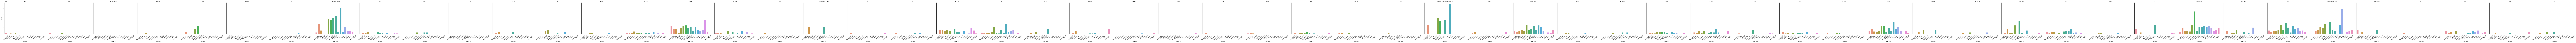

In [237]:
# Graph of the most Popular genres by these studios
g = sns.catplot(x = "genres", y = "profit", col = "studio", kind = "bar", data = df_studio_genres_clean)
g.set_axis_labels("Genres", "Profit")
g.set_titles(col_template = "{col_name}")
g.set_xticklabels(rotation = 45)
g.tight_layout()

#### Insight
    Graph of the most profitable genres by studios with most studios making adventure and animation, but show that the most 
    successful studios film a breath of genres

In [187]:
# Grabbing only the genres by the two most popular studios
df_studio_genres_top2 = df_studio_genres.loc[(df_studio_genres["studio"] == "Buena Vista") | 
                                             ((df_studio_genres["studio"] == "Paramount/DreamWorks"))]
df_studio_genres_top2

,studio,genres,Unnamed: 0,start_year,runtime_minutues,id,production_budget,worldwide_gross,domestic_gross_y,year,month,profit
83,Buena Vista,Action,1068.312500,2014.750000,126.562500,35.062500,1.968812e+08,7.564638e+08,2.898625e+08,2014.750000,6.531250,5.595826e+08
84,Buena Vista,Adventure,1079.616667,2014.433333,113.866667,39.600000,1.744967e+08,6.523667e+08,2.504567e+08,2014.433333,6.900000,4.778701e+08
85,Buena Vista,Animation,1034.791667,2013.875000,97.833333,42.208333,1.476042e+08,5.710786e+08,2.202542e+08,2013.875000,7.666667,4.234745e+08
86,Buena Vista,Biography,919.142857,2013.285714,129.000000,45.142857,3.114286e+07,7.854579e+07,5.977143e+07,2013.285714,8.428571,4.740293e+07
87,Buena Vista,Comedy,1081.625000,2013.850000,104.900000,45.400000,1.102425e+08,4.214923e+08,1.684525e+08,2013.850000,8.100000,3.112498e+08
88,Buena Vista,Crime,1366.000000,2014.000000,119.500000,45.000000,6.050000e+07,1.367410e+08,4.740000e+07,2014.000000,3.000000,7.624096e+07
89,Buena Vista,Drama,1001.708333,2013.208333,121.416667,39.250000,4.655000e+07,1.548743e+08,7.680000e+07,2012.916667,7.500000,1.083243e+08
90,Buena Vista,Family,867.045455,2013.545455,109.318182,51.227273,1.132227e+08,3.356166e+08,1.129545e+08,2013.318182,6.636364,2.223939e+08
91,Buena Vista,Fantasy,1137.000000,2015.176471,121.823529,31.823529,1.990882e+08,6.874033e+08,2.348235e+08,2014.882353,6.823529,4.883151e+08
92,Buena Vista,History,928.000000,2013.500000,138.750000,32.750000,6.125000e+07,1.604782e+08,9.050000e+07,2013.500000,8.500000,9.922823e+07


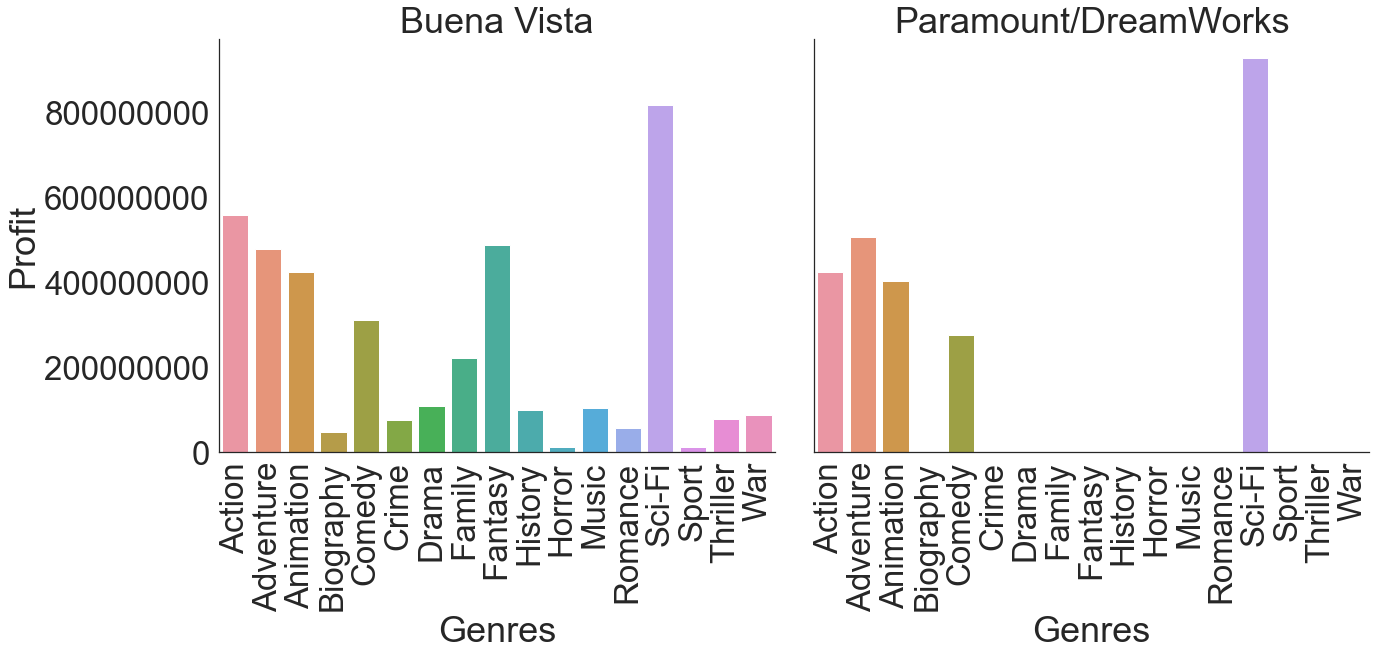

In [236]:
# Graph of the most Popular genres by these studios
with sns.plotting_context("notebook", font_scale = 3):
    g = sns.catplot(x = "genres", y = "profit", col = "studio", kind = "bar", data = df_studio_genres_top2, 
                    height =10, aspect = 1)
    g.set_axis_labels("Genres", "Profit")
    g.set_titles(col_template = "{col_name}")
    g.set_xticklabels(rotation = 90)
    # g.set_yticklabels( fontsize=30)
    plt.ticklabel_format(style = "plain", axis = "y")
    g.tight_layout()
    plt.savefig("Images/StudioGenres.png")

#### Insight
    Shows the two most successful studios Buena Vista and Paramount/DreamWorks and the genres in which their movies 
    released.  It seems that Action, Adventure, Animation, Comedy, and Sci-fi are their most profitable genres.